<div align="right"><sub>Artificial Intelligence and Data Science, Semester 1, 2024</sub>
</div>


# Assignment 1
Student Name: <i>Please enter your name here</i>

Due Date: Friday, April 12th, 11:59pm.

Value: 25% of course mark

Every numbered task is worth 1 mark.

---


##### Learning outcomes
- <font size="1">Analyze the principles, advantages, limitations, applications and implications of data-driven artificial intelligence to be a productive and responsible practitioner.</font>
- <font size="1">Choose, implement and evaluate models to solve machine learning problems.</font>
- <font size="1">Apply data science techniques to fetch, scrub, explore, manipulate, visualize, evaluate and interpret complex quantitative data.</font>

### Exercises on Linear Regression   

In this exercise, you will be working with statistical data about crime data in different cities that relate predictors/features such as educational level of the population, government expenditure on policing, individual income and inequality with crime in a given city.  The file containing the data set for this assignment is `crime.csv`.  Make sure you open the file and visually inspect it yourself to understand the structure of the data. 

To summarize, in this data set, the **features/predictors** ($X$) are:

* Education: mean years of schooling of the population aged 25 years or over
* Police: per capita expenditure on police protection
* Income: Average per capita monthly income
* Inequality: Income inequality is calculated as the percentage of families earning below half the median income

and the **response variable/target/outcome** ($y$) is:

* Crime: crime rate as number of offenses per 100,000 population

you can load the data into memory and output the first 5 instances in the dataset using a `pandas` dataframe:

In [7]:
import pandas as pd

data = pd.read_csv('crime.csv', )
print(data.head())

   Education  Police  Income  Inequality  Crime
0       12.1     5.8    3940        26.1    791
1        7.3    10.3    5570        19.4   1635
2       10.9     4.5    3180        25.0    578
3        6.1    14.9    6730        16.7   1969
4        7.1    10.9    5780        17.4   1234


You can extract the feature matrix $X$ (education, police, income, inequality) and the target vector **y** (crime) using the following code:

In [8]:
import numpy as np
from sklearn.utils import shuffle
feature_cols = ['Education','Police','Income','Inequality']
target = ['Crime']
X = np.array(data[feature_cols])
y = np.array(data[target])
X, y = shuffle(X, y, random_state=1)

1. Plot the Education predictor/feature variable against Crime (the predictor should be on the x axis and the dependent variable, crime, on the y axis) using a scatterplot. Plot the Police predictor/feature variable against Crime. Plot the Income predictor/feature variable against Crime. Plot the Inequality predictor/feature variable against Crime. 

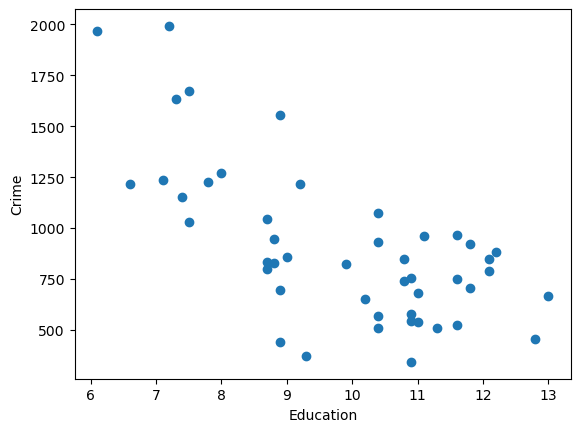

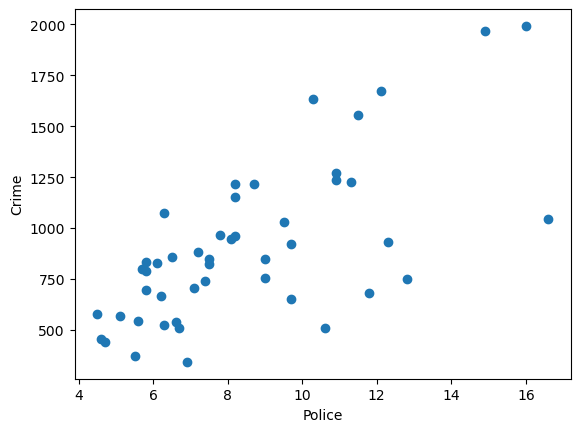

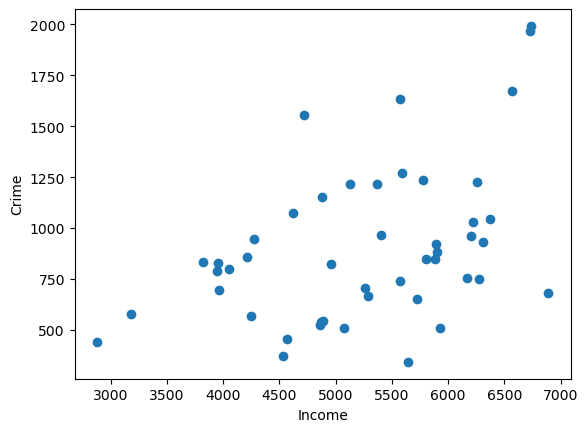

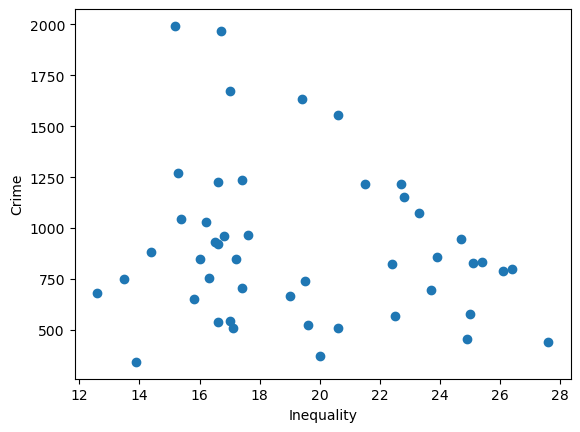

In [9]:
%matplotlib inline
import pylab as plt
# This is plotting the data of Crime Vs Education
EduCrime = plt.scatter(data['Education'], data['Crime'])
plt.xlabel('Education')
plt.ylabel('Crime')
plt.show()

# This is plotting the data of Crime Vs Police
PolCrime = plt.scatter(data['Police'], data['Crime'])
plt.xlabel('Police')
plt.ylabel('Crime')
plt.show()

# This is plotting the data of Crime Vs Income
IncCrime = plt.scatter(data['Income'], data['Crime'])
plt.xlabel('Income')
plt.ylabel('Crime')
plt.show()

# This is plotting the data of Crime Vs Inequality
InequalCrime = plt.scatter(data['Inequality'], data['Crime'])
plt.xlabel('Inequality')
plt.ylabel('Crime')
plt.show()

<ol start="2">
<li>Is the education variable positively or negatively correlated with crime? Is the police variable positively or negatively correlated with crime?</li>
</ol>

In [10]:
#Education is Negatively correlated with Crime because as Education data increases Crime data decreases
#Police is Positvely correlated with Crime because as Police data increases Crime data also icreases

<ol start="3">
<li>Split the data in 2 halves: training set and test set</li>
</ol>

In [11]:
# This is splitting the data into test and training data
train_set_size = 23
X_train = X[:train_set_size]
X_test = X[train_set_size:]

y_train = y[:train_set_size]
y_test = y[train_set_size:]

<ol start="4">
<li>Fit a multivariate linear regression model on the training data using all the features available</li>
</ol>

In [12]:
# This is using linear regression on the training data
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train);

<ol start="5">
<li>What are the intercept ($\theta_0$) and coefficients ($\theta_1$, $\theta_2$, $\theta_3$ and $\theta_4$) of the model?</li>
</ol>

In [13]:
# This is printing the Intercept and coefficients for the data
print(model.intercept_)
print(model.coef_ )

[-1455.49210253]
[[-72.25192429  43.58467713   0.28595797  61.61793052]]


<ol start="6">
<li>What is the $R^2$ score (i.e. the coefficient of determination that measures the proportion of the outcomes variation explained by the model) for the training data? and for the test data?</li>
</ol>

In [14]:
# This is finding the 𝑅2 score on both the training and test data
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.6648437654090441
0.7175061898761805


<ol start="7">
<li>Given the following imaginary cities with the provided values for the predictors education, police, income and inequality, use the previously trained model to predict which city should have the highest level of crime:</li>
</ol>

| City name        | education           | police  | income  | inequality |
| ------------- |:-------------:| -----:| -----:| -----:|
| City 1      | 10 | 5 | 6000  | 16   |
| City 2      | 8 | 11 | 4500  | 25   |
| City 3      | 6 | 8 | 3780  |  17  |
| City 4      | 12 | 6 | 5634  |  22  |

In [15]:
# This is pulling the data from the table above
data = [
    [10, 5, 6000, 16],  # City 1
    [8, 11, 4500, 25],  # City 2
    [6, 8, 3780, 17],   # City 3
    [12, 6, 5634, 22]   # City 4
]

# This is predicting which city is most dangerous by using the data from before to base its calculations on
pred_crime_level = model.predict(data)
print(pred_crime_level)
print(max(pred_crime_level))
print("City 2 has the highest predicted crime rate")

[[ 741.54677046]
 [1273.18309608]
 [ 588.09972806]
 [ 905.67456379]]
[1273.18309608]
City 2 has the highest predicted crime rate


<ol start="8">
  
<li>Re-instantiate your linear regression model with the parameter `fit_intercept` set to `False` and rerun your analysis on the entire feature matrix $X$. When we set the `fit_intercept` to `False` we are basically fitting a model with no intercept parameter $\theta_0$. Output the coefficients you get for $\theta_1 ... \theta_4$.</li>
</ol>

In [16]:
# This is Re-instantiating my linear regression model but changed the fit_intercept to flase
model_no_int = linear_model.LinearRegression(fit_intercept=False)
model_no_int.fit(X_train, y_train)
coef = model_no_int.coef_
print(coef)

[[-95.43493953  37.78051885   0.17766108  30.10316993]]


<ol start="9">
  
<li>Calculate the coefficients for $\theta_1 ... \theta_4$ using the analytical/close form solution (i.e. linear algebra equation) of linear regression for $X$. Make sure those estimates coincide with what you get in Exercise 8 to be certain you got it right. Use the matrix algebra functionality provided by the `numpy` library to find the optimal vector **$\theta$**. Provide the line of code you created to calculate the solution.</li>
</ol>

In [17]:
%matplotlib inline
import numpy as np
# This is calculating the optimal vector
coef_lae = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print("Coefficients (θ1...θ4) using analytical/close form solution is: ", coef_lae)

Coefficients (θ1...θ4) using analytical/close form solution is:  [[-95.43493953]
 [ 37.78051885]
 [  0.17766108]
 [ 30.10316993]]


### Exercise on Linear Algebra **(Hard)**

The following code snippet generates a Matrix of 10 rows and 10 columns. Think of each row as a vector. 

In [18]:
%matplotlib inline
import numpy as np
np.random.seed(20) # for reproducibility purposes
dim=10
M = np.random.random(dim*dim).reshape(dim,dim)
# M = np.array([[0,1,1],[1,3,3],[1,2,3]]) #Sanity check with a simplified version of the problem to use while you develop your solution
M

array([[0.5881308 , 0.89771373, 0.89153073, 0.81583748, 0.03588959,
        0.69175758, 0.37868094, 0.51851095, 0.65795147, 0.19385022],
       [0.2723164 , 0.71860593, 0.78300361, 0.85032764, 0.77524489,
        0.03666431, 0.11669374, 0.7512807 , 0.23921822, 0.25480601],
       [0.85762553, 0.94977903, 0.56168686, 0.17878052, 0.77025193,
        0.49238104, 0.63125307, 0.83949792, 0.4610394 , 0.49794007],
       [0.67941112, 0.65078591, 0.26879524, 0.06732467, 0.77144514,
        0.48098413, 0.32920641, 0.51064106, 0.26362883, 0.31051155],
       [0.62685344, 0.55744981, 0.31857956, 0.39484322, 0.25797459,
        0.58224112, 0.16162871, 0.59813382, 0.82582358, 0.15639172],
       [0.73430052, 0.40864343, 0.7786879 , 0.80397057, 0.78607144,
        0.59228702, 0.6644892 , 0.64656729, 0.42563648, 0.51356833],
       [0.50125784, 0.03708381, 0.7081161 , 0.6204306 , 0.77780853,
        0.45940947, 0.37980555, 0.2918922 , 0.55722886, 0.0841636 ],
       [0.63128167, 0.94457049, 0.8912375

<ol start="10">
  
<li>Your task is to estimate the 2 row vectors that are most similar to each other in the entire matrix in terms of the direction in which they point in high dimensional space (i.e. vector magnitude should not play a role in your calculation) . Let me give you a few hints:</li>
</ol>

- Normalize all the rows in the matrix (using the L2 norm) so all row vectors have length 1
- Dot product every row with every other row using a single matrix multiplication
- Extract the maximum result from the previous operation after accounting for the fact that the result is a symmetric matrix (i.e. $R_{i,j}=R_{j,i}$) and that the numbers in the main diagonal are just the dot product of a vector with itself (So they should not count towards computing the maximum)
- Start working with a super simple matrix (i.e. ```M = np.array([[0,1,1],[1,3,3],[1,2,3]])```) to visually verify that your solution is correct before applying it to the large matrix

### Exercises on Classification

#### Business Churn Rate

"Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service. It's a critical figure in many businesses. Understanding what keeps customers engaged is valuable. Consequently, there's growing interest among companies to develop better churn-detection techniques. Predicting churn is particularly important for businesses with subscription models such as cell phone or pay-TV who want to keep their clients and understand why clients leave their services. 

The data set we'll be using, `churn.csv`, is real data from a Telecommunications company customer data set. Each row represents a subscribing telephone customer. Each column contains customer attributes such as call minutes used during different times of day, charges incurred for services, lifetime account duration, etc. The last column is the label (i.e. target) indicating whether the customer quit the service (1) or is still a customer of the telecom company (0). 

Your task is:

<ol start="11">
<li> Read the data from the file into the appropriate $X$ and $y$ data structures, shuffle the data and split the data into a training set and a test set (test set size should be 33%)</li>
</ol>

In [19]:
%matplotlib inline
import pandas as pd

data = pd.read_csv('churn.csv', )
print(data.head())

import numpy as np

# This is setting up the data from the churn.csv file to be used and inputting the data into a table and the shuffling the data
feature_cols = ['Account Length', "Int'l Plan", 'VMail Plan', 'VMail Message', 
                'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 
                'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 
                'Intl Calls', 'Intl Charge', 'CustServ Calls']
target = ['label']
X = np.array(data[feature_cols])
y = np.array(data[target])

X, y = shuffle(X, y, random_state=1)

# This is splitting the data into test and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


   Unnamed: 0  Account Length  Int'l Plan  VMail Plan  VMail Message  \
0           0             128           0           1             25   
1           1             107           0           1             26   
2           2             137           0           0              0   
3           3              84           1           0              0   
4           4              75           1           0              0   

   Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  Eve Charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   
2     243.4        114       41.38     121.2        110       10.30   
3     299.4         71       50.90      61.9         88        5.26   
4     166.7        113       28.34     148.3        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0         

<ol start="12">
<li> Scale the data using the StandardScaler class from `scikit-learn`</li>
</ol>    

In [20]:
%matplotlib inline
from sklearn import preprocessing

# This is scaling the test and training data using StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

<ol start="13">
<li> Train a logistic regression model and estimate its performance on the test data</li>
</ol>    

In [21]:
%matplotlib inline
# This is using Logistic Regression on the test data
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression()
logRegModel.fit(X_test_scaled, y_test)

# This is printing the estimated performance on the test data
print(logRegModel.score(X_test_scaled, y_test))

0.8636363636363636


/Users/declanalfreddehaas/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<ol start="14">
<li> Train a K-nearest neighbors classifier and estimate its performance on the test data</li>
</ol>
You can read about the K-nearest neighbors machine learning model in the scikit-learn documentation: 

[Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#classification) and 



[sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [22]:
%matplotlib inline
from sklearn.neighbors import ( NeighborhoodComponentsAnalysis, KNeighborsClassifier )
from sklearn.pipeline import Pipeline

# This is seting up the K-nearest neighbor to be used on the data 
nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=2)

# This is using the data and finding the K-nearest neighbor in the trianing data
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
Pipeline(...)

# This is printing the estimated preformance of the K-nearest neighbors.
print(nca_pipe.score(X_test, y_test))

/Users/declanalfreddehaas/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8590909090909091


/Users/declanalfreddehaas/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Exercise on Regularization

Using the Housing prices data set (i.e. `Housing.csv` file):

<ol start="15">
<li> Fit a linear regression model using Ridge regularization and print out the coefficients of the model </li>
<li> Fit a linear regression models using Lasso regularization and print out the coefficients of the model. Describe what is the most striking difference between the coefficients of Ridge and Lasso regression. </li>
</ol>

I provide you with some initial code to get you started:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl
import pandas as pd

df=pd.read_csv('./Housing.csv')
mapping={'yes':1,'no':0}
mapping2={'furnished':2,'semi-furnished':1,'unfurnished':0}

df['mainroad'] = df['mainroad'].map(mapping)
df['guestroom'] = df['guestroom'].map(mapping)
df['basement'] = df['basement'].map(mapping)
df['hotwaterheating'] = df['hotwaterheating'].map(mapping)
df['airconditioning'] = df['airconditioning'].map(mapping)
df['prefarea'] = df['prefarea'].map(mapping)
df['furnishingstatus'] = df['furnishingstatus'].map(mapping2)
df

X =df.iloc[:,1:].values
y=df['price'].values

In [24]:
#15
# Uses Ridge Regularization to output the coefficients of the model
ridge_model = Ridge(alpha=10000000)
ridge_model.fit(X, y)

print(ridge_model.coef_)

[460.17051892  21.43309364  21.1690726   33.17535576   5.06078533
   7.03561685   7.85911244   2.0880365   15.81885056  17.17616357
   8.82559417  16.51476552]


In [25]:
#16
# Uses Lasso Regularization to output the coefficients of the model
lasso_model = Lasso(alpha=10000000)
lasso_model.fit(X, y)
print(lasso_model.coef_)

#The most striking difference between the coefficients of Ridge and Lasso regression is that the lasso array is mainly filled with 0. and with one set of numbers where Ridge has an array full with numbers and no 0

[459.84762881   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.        ]


### Exercise on Clustering

<ol start="17">

<li> Given the following artificial data set, which is unlabeled, use the K-means algorithm included in scikit-learn. Use a  `n_clusters` parameter value of 3 (i.e. 3 clusters) to fit the data $X$ above and plot the data color coded for the estimated cluster each data point is assigned to.
</li>
</ol>

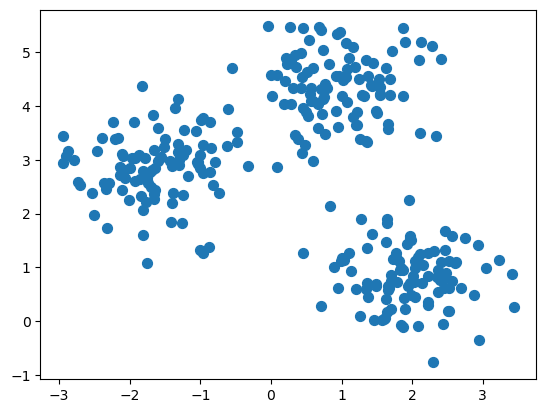

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=3,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

Your final plot should look something like the following figure with the colors indicating cluster membership as determined by the algorithm:

![](./kmeansResult.png)

/Users/declanalfreddehaas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


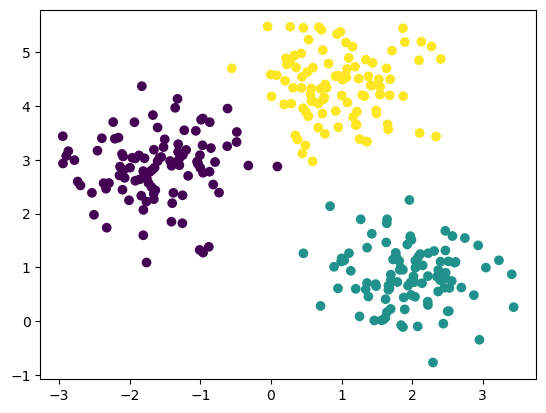

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=8)
y_predicted = kmeans.fit(X).labels_

# Puts colours on the blob clusters and seperating them
plt.scatter(X[:, 0], X[:, 1], c=y_predicted)

### Exercise on Dimensionality Reduction

<ol start="18">

<li> We first create 200 random two-dimensional data points. The data points are sampled from a multinomial normal distribution.
You don't have to understand precisely how to do this. Simply understand that the following code snippet creates some synthetic 2D data. Use PCA to find out the 2 principal components of the data in $X$. Please, print out (numerically) those 2 components and the percentage of variance explained by each one of those components.
</li>
</ol>

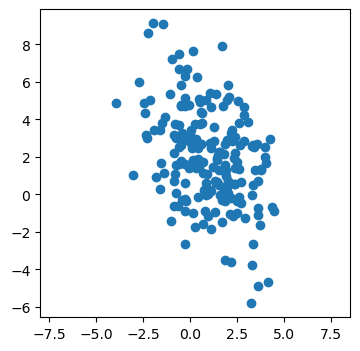

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(seed=3)
Cov = np.array([[2.9, -2.2], [-2.2, 6.5]])
X = np.random.multivariate_normal([1,2], Cov, size=200)
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1])
plt.axis('equal') # equal scaling on both axis;
plt.show()

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

# Prints out the 2 components
print(pca.components_)

# Prints out percentage of variance
print(pca.explained_variance_ratio_)

[[ 0.36320602 -0.93170886]
 [-0.93170886 -0.36320602]]
[0.77097987 0.22902013]


### Exercises on Scraping information from the web

<ol start="19">

<li> Build  a web spider using [Scrapy](https://scrapy.org) that automatically scrapes data about Dunedin real estate properties for sale in Trade Me.
Use the following start URL: <a href="https://www.trademe.co.nz/Browse/CategoryAttributeSearchResults.aspx?search=1&cid=3399&rptpath=350-&sidebar=0&132=PROPERTY&selected135=&selected136=&134=&135=&29=&122=0&122=0&49=0&49=0&153=Dunedin%2c+otago&searchString=Dunedin%2c+otago">Properties for sale in Dunedin</a>

Crawl the index/navigation pages and extract and follow links to each individual property. From each individual property listing extract:
- title
- price
- description
- address 

Store the results of the crawling into a `CSV` file which should look similar to the following:

### Exercise on getting data from an API

<ol start="20">

<li> Use any API of your choice to retrieve the closing price of Apple stock over the past year. Apply a smoothing (i.e. low pass filter) using a time size of 5 and plot the results.
</li>
</ol>

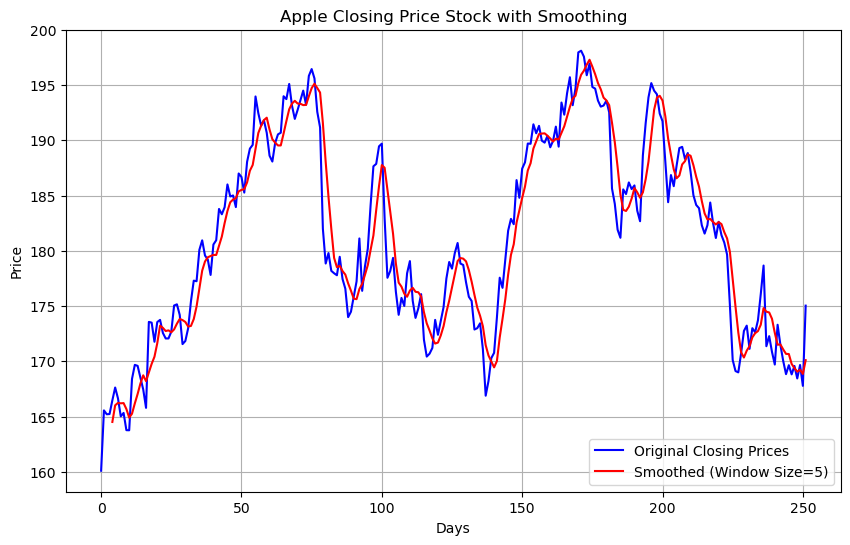

In [30]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

response = requests.get("https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2023-04-12/2024-04-12?adjusted=true&sort=asc&limit=365&apiKey=jyADLLUbOacC5nGulfxCiXNqWvOKiaaB")
data = response.json()

closing_prices = [entry['c'] for entry in data['results']]

# This is allowing smoothing on the lines between the data points
window_size = 5
smoothed_prices = pd.Series(closing_prices).rolling(window=window_size).mean()

# This is showing both the original price and the smoothed price for apple closing price stocks
plt.figure(figsize=(10, 6))
plt.plot(closing_prices, label='Original Closing Prices', color='blue')
plt.plot(smoothed_prices, label=f'Smoothed (Window Size={window_size})', color='red')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Apple Closing Price Stock with Smoothing')
plt.legend()
plt.grid(True)
plt.show()

### Machine learning theory
<ol start="21">

<li> Let's say the blue dots In the following plot we present some data. The orange curve represents a linear regression model fitted to the data. In your own words, can you describe what is the problem with this model? How would you improve the model?
</li>
</ol>

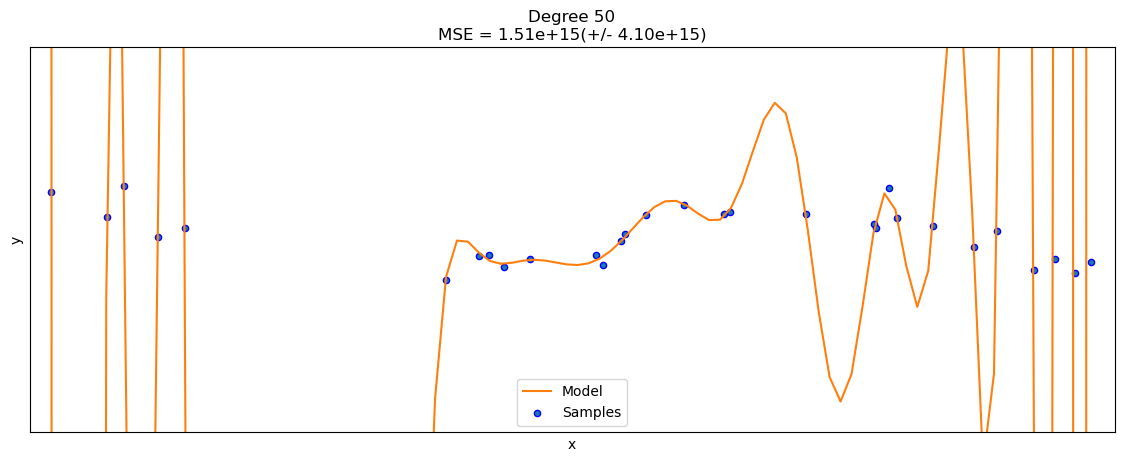

In [31]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(2.8 * np.pi * X)


np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.3

plt.figure(figsize=(14, 5))
degree=50
plt.setp(plt.gca(), xticks=(), yticks=())

polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_val_score(
    pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
)

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model",color="C1")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-5, 5))
plt.legend(loc="best")
plt.title(
    "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degree, -scores.mean(), scores.std()
    )
)
plt.show()

In [32]:
#The problem with this graph is that is has been overfitted. To improve this model I would use regularization tools such as Lasso or Ridge to help the coefficients smaller

### Deliverables

<ol start="22">

<li> You should hand in this single python notebook file (.ipynb) containing all the necessary code to answer each of the previously enumerated tasks. Include comments in the code when necessary to clarify what the code is doing. Use the separate code cells provided to organize your code as answers to the Assessment tasks. Use Python comments or Markdown cells to provide textual answers to a task when appropriate.  Please, make sure your code runs smoothly so I can execute it in my computer. Name your Python notebook according to the following pattern: `yourLastName_AI_A1.ipynb`. Create your own private repository for you to work on the assignment by using the following link: 
</li></ol>    

[https://classroom.github.com/a/2dhMj-LS](https://classroom.github.com/a/2dhMj-LS)

The notebook file and the data files should then be available in your own private GitHub repository `https://github.com/OPClasses2/assessment-1-YourGithubUserName`. 